<div id="home"></div> 


 Reading, Displaying and Saving Images 



In [3]:
from google.colab import drive
drive.mount('/content/drive')

# library imports 
import cv2 
import numpy as np
import matplotlib.pyplot as plt

# plot images inline in the Jupyter Notebook 
%matplotlib inline

Mounted at /content/drive


<div id="loading_images"></div> 


## Loading Images with OpenCV

<div style="text-align: right"><a href="#home">Back to ToC</a></div> 

----

Loading images with OpenCV is simple.  It's actually only a single line of code, but there are some things you need to look out for... like the fact that **OpenCV will import all images (grayscale or color) as having 3 channels**, so in order to read a grayscale image as only having a single channel you need to pass the arg 0 after the image location. 

**NOTE:** The following image formats can be read by **cv2.imread()**:

* Windows bitmaps - *.bmp, *.dib (always supported)
* JPEG files - *.jpeg, *.jpg, *.jpe (see the Notes section)
* JPEG 2000 files - *.jp2 (see the Notes section)
* Portable Network Graphics - *.png (see the Notes section)
* WebP - *.webp (see the Notes section)
* Portable image format - *.pbm, *.pgm, *.ppm (always supported)
* Sun rasters - *.sr, *.ras (always supported)
* TIFF files - *.tiff, *.tif (see the Notes section)

In [15]:
# load an image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/dolphin.png')

# load an image as a single channel grayscale 
img_single_channel = cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/dolphin.png', 0)

# print some details about the images 

print('The shape of img_single_channel is:     {}'.format(img_single_channel.shape))

The shape of img_single_channel is:     (320, 500)


<div id="displaying_images"></div> 


## 0.0.2 Displaying Images with OpenCV

<div style="text-align: right"><a href="#home">Back to ToC</a></div>  

----

#### *Warning:  The code for Displaying images using OpenCV has the tendancy to crash Jupyter Kernels.  It is supposed to be used strictly as a Python Script, that is why it's been removed from an executable code block in this Notebook.*

### Let's first start by using the OpenCV .imshow() function 

* The **cv2.imwhow()** takes two required arguments
    * 1st Argument --> The name of the window where the image will be displayed
    * 2nd Argument --> The image to show

    **IMPORTANT NOTE:** You can show as many images as you want at once they just have to be different window names. 


In addition to the **cv2.imshow()** function there are a few other required items to make this work correctly. 
* The first peice is the **cv2.waitKey()** function
    * Its argument --> the time in milliseconds
    * The function waits for specified milliseconds for any keyboard event. If you press any key in that time, the program continues. If 0 is passed, it waits indefinitely for a key stroke.  It can also be set to detect specific key strokes like if key a is pressed etc.
    * **IMPORTANT NOTE**: Besides binding keyboard events this waitKey() also processes many other GUI events, so you **MUST** use it to actually display the image.
    
* The second required piece of code is the **cv2.destroyAllWindows()** function
    * This simply destroys all the windows we created. 
    * **IMPORTANT NOTE**: If you want to destroy any specific window, use the function **cv2.destroyWindow()** instead where you pass the exact window name as the argument.
    
---
    
    
Because this code will freeze the **Jupyter Notebook Kernel** this code has been moved out of an executable code block 

```python 
# display the image with OpenCV imshow()
cv2.imshow('OpenCV imshow()', img)

# OpenCV waitKey() is a required keyboard binding function after imwshow()
cv2.waitKey(0)

# destroy all windows command
cv2.destroyAllWindows()
```

---- 

**IMPORTANT NOTE:** There is a special case where you can already create a window and load image to it later. In that case, you can specify whether window is resizable or not. It is done with the function cv2.namedWindow(). By default, the flag is cv2.WINDOW_AUTOSIZE. But if you specify flag to be cv2.WINDOW_NORMAL, you can resize window. It will be helpful when image is too large in dimension and adding track bar to windows.

```python 
# Creating the window beforehand and loading an image into it later 
cv2.namedWindow('Named-Empty Resizable Window', cv2.WINDOW_NORMAL)
cv2.imshow('Dolphins are awesome!',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

<div id="plotting_images"></div> 


## 0.0.3 Plotting Images inline with Matplotlib

<div style="text-align: right"><a href="#home">Back to ToC</a></div> 

----

If you are working in a Jupyter Notebook environment plotting images with Matplotlib is the best way to display images.  You can think of images as functions, because that's exactly what they are.  They are basically just matricies or a set of matricies containing values between a set range each one referred to as a pixel.  It's because of this fact that images can be plotted just as any other funcitons can be. For the sake of plotting in this notebook we will use the Python Package Matplotlib, and more specifically the **.imshow()** function.

The **plt.imshow()** function (not to be confused with the **cv2.imshow()** function) can take quite a few arguments to learn more about this function you can see the documentation <a href="https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.imshow.html">Here</a>

For the purposes of this tutorial, I'm only using one additional argument: 
* cmap --> This is the color mapping if this is not used in this case matplotlib will try to plot the gray images as a RGB image because it has a depth of 3 channels without the 0 passed in cv2.imread() 

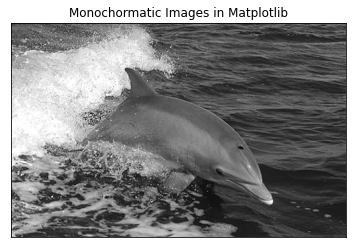

Image Width: 500px, Image Height: 320px, Image Depth: 3ch
Image Type: <class 'numpy.ndarray'>


In [16]:
# first read in the image using OpenCV
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/dolphin.png')

# Adding a title to the Plot 
plt.title('Monochormatic Images in Matplotlib')

# Using the plt.imshow() to add the image plot to the matplotlib figure 
plt.imshow(img, cmap='gray')

# This just hides x and y tick values by passing in empty lists to make the output a little cleaner 
plt.xticks([]), plt.yticks([]) 
plt.show()

# print information about the image size and type 
height, width, depth = img.shape
print('Image Width: {}px, Image Height: {}px, Image Depth: {}ch'.format(width, height, depth))
print('Image Type: {}'.format(type(img))) # openCV stores images as np.ndarray

### Okay, let's try to plot a color image. 

Hmm, something doesn't look quite right in the cell below. That's because Color images loaded by default in OpenCV are in BGR (blue, green, red) mode. However, Matplotlib displays images in RGB mode. Therefore color images will not be displayed correctly in Matplotlib if image is read with OpenCV and plotted directly using Matplotlib.

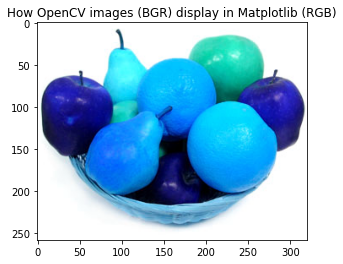

In [17]:
# Example of how matplotlib displays color images from OpenCV incorrectly
img_color = cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/fruit.png')
plt.title('How OpenCV images (BGR) display in Matplotlib (RGB)')
plt.imshow(img_color)
plt.show()

Okay, let's see some ways of handling this little hicup.  Below I've outlined two options, these are obviously not the only options, but options nonetheless. 

### The way to plot OpenCV color images Correctly - Option 1
The first option is to use the built in OpenCV color space conversion variable flags.  For our case we want to convert from BGR (Blue, Green, Red) colorspace to RGB (Red, Green, Blue) to do this we can use the **cv2.cvtColor()** function pass in the image and the **cv2.COLOR_BGR2RGB** variable flag 

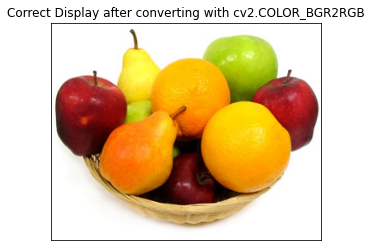

In [18]:
# Option #1 convert the color using cv2.COLOR_BGR2RGB
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
plt.title('Correct Display after converting with cv2.COLOR_BGR2RGB')

# Tip: passing in empty lists for xticks & yticks will turn off 
plt.imshow(img_rgb), plt.xticks([]), plt.yticks([])
plt.show()

### The way to plot OpenCV color images Correctly - Option 2
Remember when I said images are functions?  Well if you kept that in mind you may have already thought of this method on your own.  What I'm referring to here is to using the fact that images are stored as numpy arrays to manually move the channels of the image matrix by slicing operations. 

Let's explain the meat and potatoes of this code here:

```python 
img_rgb_numpy = img_color[:,:,::-1]
```

Remember that images are arrays of width, height, and depth.  For our particular example the depth is a BGR ordering, so what's exactly happening here?  Basically we leave the width and height the same by slicing all indicies with the colon (:), as for the depth, well we are just reversing its order:  BGR reversed is RGB! 

In [ ]:
# Reverse the color porition of the image array 
img_rgb_numpy = img_color[:,:,::-1]
plt.title('Correct Display after matrix slicing the Numpy Array')
plt.imshow(img_rgb_numpy), plt.xticks([]), plt.yticks([])
plt.show()

<div id="saving_images"></div> 



## 0.0.4 Saving Images with OpenCV

<div style="text-align: right"><a href="#home">Back to ToC</a></div> 

----

Saving images with OpenCV is done with the **cv2.imwrite()** function.  This function takes a relative or absolute path where you want to save the image and the image you want to save. 

If you want to try everything we learned together, here's some code you can try from a Python script. 

```python
# Saving an Image on a key press 
img = cv2.imread('images/dolphin.png')
cv2.imshow('Option to Save image', img)
print("press 's' to save the image as dolphin_3.png\n")
key = cv2.waitKey(0) # NOTE: if you are using a 64-bit machine, this needs to be: key = cv2.waitKey(0) & 0xFF
if key == 27: # wait for the ESC key to exit
    cv2.destroyAllWindows()
elif key == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('images/dolphin_3.png', img)
    cv2.destroyAllWindows()
```

In [19]:
# write an image with imwrite
where_to_save = '/content/drive/MyDrive/Colab Notebooks/images/dolphin_2.png'
cv2.imwrite(where_to_save, img)

print('Image saved as {}'.format(where_to_save))

Image saved as /content/drive/MyDrive/Colab Notebooks/images/dolphin_2.png
